In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [231]:
df = pd.read_csv('data_crypto.csv')#index_col='Date')
# df = df.set_index('Date')
print(df.head(5))

         Date         Open         High          Low        Close  \
0  2020-03-15  5201.066895  5836.645020  5169.283203  5392.314941   
1  2020-03-16  5385.229492  5385.229492  4575.357910  5014.479980   
2  2020-03-17  5002.578125  5371.348633  4981.909180  5225.629395   
3  2020-03-18  5227.113770  5331.833984  5069.335938  5238.438477   
4  2020-03-19  5245.416504  6329.735840  5236.968750  6191.192871   

        Volume  Dividends  Stock Splits    names Symbol  
0  33997889639          0             0  Bitcoin    BTC  
1  45368026430          0             0  Bitcoin    BTC  
2  38622642935          0             0  Bitcoin    BTC  
3  37878801016          0             0  Bitcoin    BTC  
4  51000731797          0             0  Bitcoin    BTC  


In [232]:
print(df.shape)

(14422, 10)


In [233]:
new_data =df #.drop(['Dividends','Stock Splits'], axis=1)
new_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,names,Symbol
0,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,33997889639,0,0,Bitcoin,BTC
1,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,45368026430,0,0,Bitcoin,BTC
2,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,38622642935,0,0,Bitcoin,BTC
3,2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,37878801016,0,0,Bitcoin,BTC
4,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,51000731797,0,0,Bitcoin,BTC
5,2020-03-20,6191.653809,6844.261719,5865.781738,6198.778320,54442976103,0,0,Bitcoin,BTC
6,2020-03-21,6206.521484,6378.135254,5932.823242,6185.066406,42494390880,0,0,Bitcoin,BTC
7,2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,40099664740,0,0,Bitcoin,BTC
8,2020-03-23,5831.374512,6443.934570,5785.004395,6416.314941,46491916000,0,0,Bitcoin,BTC
9,2020-03-24,6436.642578,6789.022949,6411.066406,6734.803711,48221910672,0,0,Bitcoin,BTC


In [234]:
df.isna()
nun = df[df.isna().any(axis=1)]
# print(nun)
print('\nTotal number of empty rows \n:', len(nun))


Total number of empty rows 
: 0



CLOSE PRICE VISUALIZATION ON ALL 20 COINS

/var/folders/__/q4wgyz5d73s4mcfkj80mdcv00000gn/T/ipykernel_1853/2480920527.py:17: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

/var/folders/__/q4wgyz5d73s4mcfkj80mdcv00000gn/T/ipykernel_1853/2480920527.py:17: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

/var/folders/__/q4wgyz5d73s4mcfkj80mdcv00000gn/T/ipykernel_1853/2480920527.py:17: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

/var/folders/__/q4wgyz5d73s4mcfkj80mdcv00000gn/T/ipykernel_1853/2480920527.py:17: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is depr

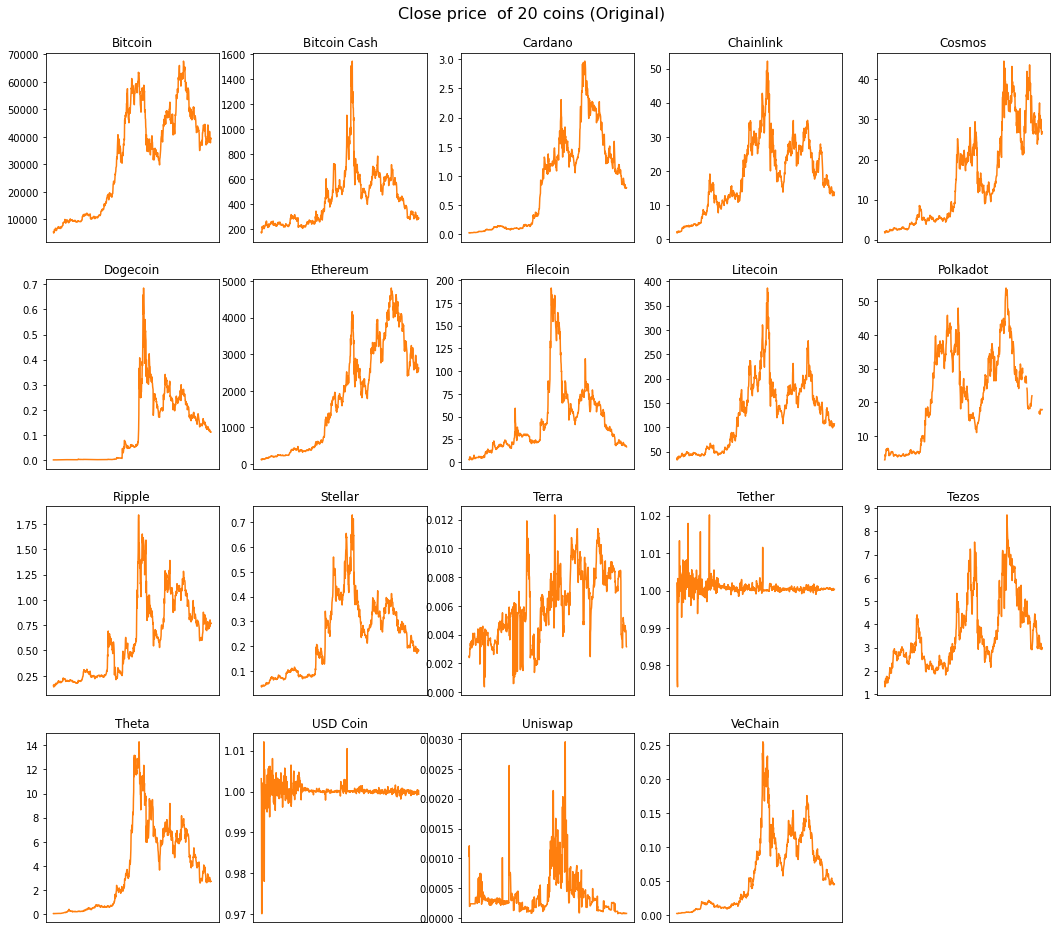

In [235]:
import matplotlib.pyplot as plt
columns=['Date',"Close",'names', ]
new_data= pd.DataFrame(new_data, columns=columns)
# new_data
res = new_data.pivot(index='Date', columns=['names'], values='Close')  #index='Date',
# res
cryptocurrency_raw_df = res.copy()
coin_list = list(res.columns)[1:]
coin = coin_list[0]
fig = plt.figure(figsize=(18,16))
fig.suptitle('Close price  of 20 coins (Original)', fontsize=16, y = 0.92)
for i in range(len(coin_list)):
    coin = coin_list[i]
    plt.subplot(4, 5, i+1)
    plt.plot(res[coin], color = 'C1')
    plt.title(coin)
    plt.xticks([])
plt.show()

DROPPING COLUMNS WITH 0 VALUES AND IRRELEVANCES

In [236]:
df = df.drop(['Stock Splits', 'Dividends', 'names', ], axis=1)

In [237]:
print(df.shape)

(14422, 7)


In [238]:
print(df.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Symbol     object
dtype: object


In [239]:
df.describe()

,Open,High,Low,Close,Volume
count,14422.000000,14422.000000,14422.000000,14422.000000,1.442200e+04
mean,1782.688152,1832.110727,1727.972252,1784.919828,1.910740e+10
std,8257.248110,8477.273564,8007.130784,8261.187093,9.497176e+11
min,0.000074,0.000077,0.000069,0.000074,0.000000e+00
25%,0.224502,0.235127,0.215534,0.225106,2.220536e+08
50%,2.649075,2.774588,2.555822,2.657964,1.029424e+09
75%,42.733231,44.295573,41.279262,42.777441,3.610410e+09
max,67549.734375,68789.625000,66382.062500,67566.828125,8.325207e+13


UNIVARIATE ANALYSIS

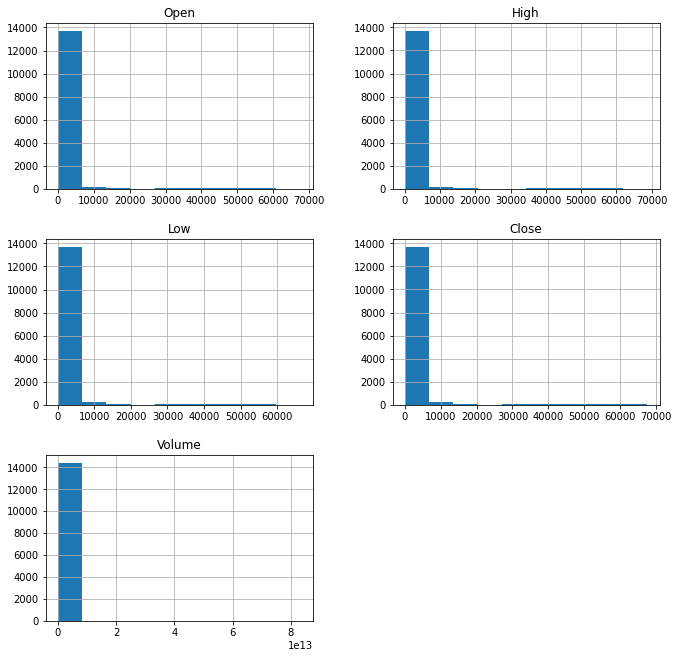

In [240]:
df.hist(figsize=(11,11))
plt.show()

In [241]:
df.skew()

/var/folders/__/q4wgyz5d73s4mcfkj80mdcv00000gn/T/ipykernel_1853/547062910.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Open       5.466771
High       5.454034
Low        5.476315
Close      5.460316
Volume    84.990475
dtype: float64

<AxesSubplot:>

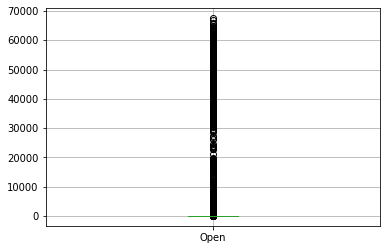

In [242]:
df.boxplot(column='Open')

<AxesSubplot:>

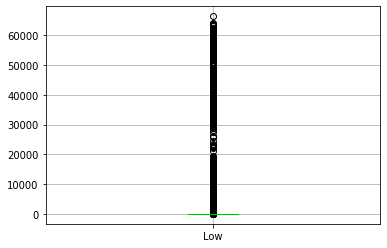

In [243]:
df.boxplot(column='Low')

<AxesSubplot:>

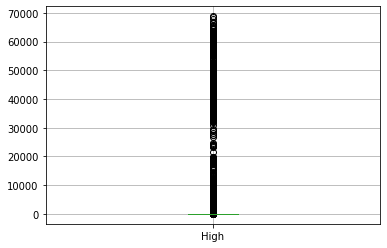

In [244]:
df.boxplot('High')

<AxesSubplot:>

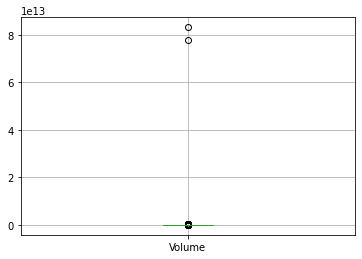

In [245]:
df.boxplot('Volume')

<AxesSubplot:>

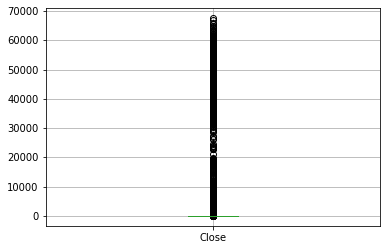

In [246]:
df.boxplot('Close')

MULTIVARIATE ANALYSIS

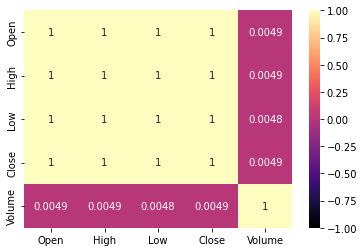

In [247]:
import seaborn as sns
corrMatrix = df.corr()
sns.heatmap(corrMatrix,center=0, vmin=-1, vmax=1,cmap='magma', annot=True)
plt.show()

In [248]:
#Pinting attributes correlation values
print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999684  0.999407  0.999207  0.004898
High    0.999684  1.000000  0.999376  0.999659  0.004926
Low     0.999407  0.999376  1.000000  0.999589  0.004836
Close   0.999207  0.999659  0.999589  1.000000  0.004889
Volume  0.004898  0.004926  0.004836  0.004889  1.000000


## ordinal encoding-----mapping desired order with a dictionary


In [249]:
coins_dict= {'BTC':1,'ETH':2,'ADA':3, 'BNB':4,'USDT':5,'DOT':6,'XRP':7,'UNI':8,'LTC':9, 'LINK':10,
           'BCH':11,'USDC':12,'XLM':13,'THETA':14,'XTZ':15,'DOGE':16,'LUNA':17, 'FIL':18,'VET':19,'ATOM':20}



# assigning the values
df['Symbol'] = df.Symbol.map(coins_dict)
df

,Date,Open,High,Low,Close,Volume,Symbol
0,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,33997889639,1
1,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,45368026430,1
2,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,38622642935,1
3,2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,37878801016,1
4,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,51000731797,1
...,...,...,...,...,...,...,...
14417,2022-03-11,28.047722,28.389145,27.091694,27.528900,726368611,20
14418,2022-03-12,27.527025,28.227278,27.215895,27.219019,364317099,20
14419,2022-03-13,27.215071,27.495592,26.077883,26.297186,454952669,20
14420,2022-03-14,26.296465,27.120045,25.862419,26.839888,605644543,20


In [250]:
#Splitting into dependent and independent data
X = df.drop(['Date','Close','Symbol'], axis=1)
y = df['Close']

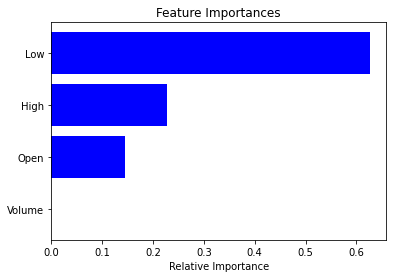

In [251]:
#FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=4) # declaring random forest model
model.fit(X, y)
train_features = X.columns
importance = model.feature_importances_
imp = np.argsort(importance)[-11:] #Top 10 features
plt.title('Feature Importances')
plt.barh(range(len(imp)), importance[imp],color='b', align='center')
plt.yticks(range(len(imp)), [train_features[i] for i in imp])
plt.xlabel('Relative Importance')
plt.show()

In [252]:
# FORWARD FEATURE ELIMINATION.... We start training with one features and subsequently increase the no. of features
from sklearn.feature_selection import f_regression


#declare d model
ffe = f_regression(X, y)  # Using target as dependent variable
vari = []
for i in range(0, len(X.columns) - 1):
    if ffe[0][i] > 10:  # Checking variable importance over 10 percent
        vari.append(X.columns[i])
print(vari)

['Open', 'High', 'Low']


In [253]:
# Dropping volume from independent  data
X_new =X.drop(['Volume'], axis=1)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11537, 3)
(2885, 3)
(11537,)
(2885,)


In [255]:
print(y_test)

12731       51.307907
14390       27.043846
8754         0.083808
12315       13.718911
2611       624.563293
             ...     
7957         1.000145
10141        2.372494
240      15290.902344
197      10709.652344
2452        30.117603
Name: Close, Length: 2885, dtype: float64


ANALYSIS FOR A SINGLE COIN

In [261]:
df2 = pd.read_csv('data_crypto.csv')#index_col='Date')
df2 = df2.set_index('Date')



print(df2.head(5))

                   Open         High          Low        Close       Volume  \
Date                                                                          
2020-03-15  5201.066895  5836.645020  5169.283203  5392.314941  33997889639   
2020-03-16  5385.229492  5385.229492  4575.357910  5014.479980  45368026430   
2020-03-17  5002.578125  5371.348633  4981.909180  5225.629395  38622642935   
2020-03-18  5227.113770  5331.833984  5069.335938  5238.438477  37878801016   
2020-03-19  5245.416504  6329.735840  5236.968750  6191.192871  51000731797   

            Dividends  Stock Splits    names Symbol  
Date                                                 
2020-03-15          0             0  Bitcoin    BTC  
2020-03-16          0             0  Bitcoin    BTC  
2020-03-17          0             0  Bitcoin    BTC  
2020-03-18          0             0  Bitcoin    BTC  
2020-03-19          0             0  Bitcoin    BTC  


In [263]:
# statistical analysis for a single coin, BTC

btc_price = df2[df2['Symbol']=='BTC']
btc_price.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.0,731.0
mean,32449.781817,33325.310401,31481.033562,32490.326962,3.919198e+10,0.0,0.0
std,18697.919402,19178.785332,18108.034658,18665.825238,2.095962e+10,0.0,0.0
min,5002.578125,5331.833984,4575.357910,5014.479980,1.225260e+10,0.0,0.0
25%,11340.639160,11535.015137,11192.779785,11362.118164,2.617690e+10,0.0,0.0
50%,36275.734375,37537.371094,34659.589844,36457.316406,3.473036e+10,0.0,0.0
75%,47790.845703,49175.048828,46685.369141,47747.423828,4.712308e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [264]:
btc_price=btc_price.drop(['Symbol','Dividends','Stock Splits'], axis=1)    #["Stock Splits","Dividends"], axis=1)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

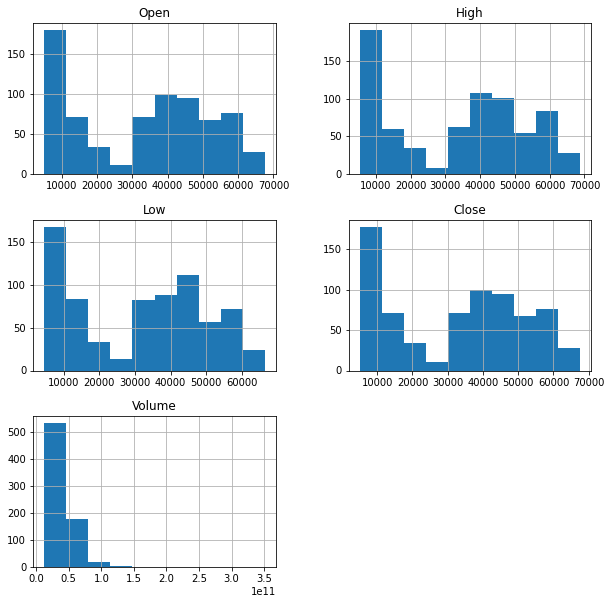

In [265]:
btc_price.hist(figsize=(10,10))

In [ ]:
btc_price.skew()

In [266]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=2,
                    # Set the subplot titles
                    subplot_titles= ['Open','High','Close', 'Volume','Low'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=btc_price.Open, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=btc_price.High, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=btc_price.Close, name='', showlegend=False), row=2, col=1)
fig.add_trace(go.Box(x=btc_price.Volume, name='', showlegend=False), row=2, col=2)
fig.add_trace(go.Box(x=btc_price.Low, name='', showlegend=False), row=3, col=1)

fig.update_layout(height=800, width=1000)
fig.show()

BIVARIATE ANALYSIS OF BTC PRICES

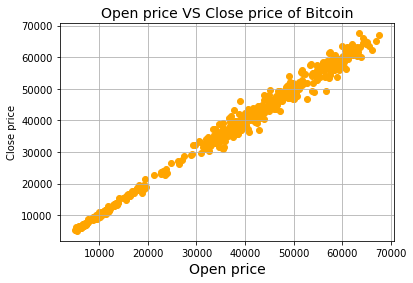

In [267]:
plt.scatter(btc_price['Open'],btc_price['Close'], color='orange')
plt.title('Open price VS Close price of Bitcoin', fontsize=14)
plt.xlabel('Open price', fontsize=14)
plt.ylabel('Close price')
plt.grid(True)
plt.show()

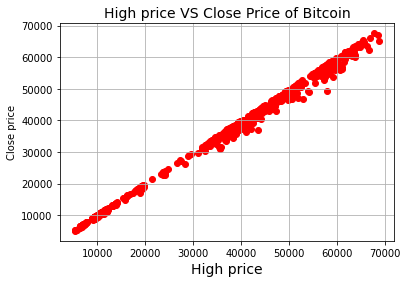

In [268]:
plt.scatter(btc_price['High'],btc_price['Close'], color='red')
plt.title('High price VS Close Price of Bitcoin', fontsize=14)
plt.xlabel('High price', fontsize=14)
plt.ylabel('Close price')
plt.grid(True)
plt.show()

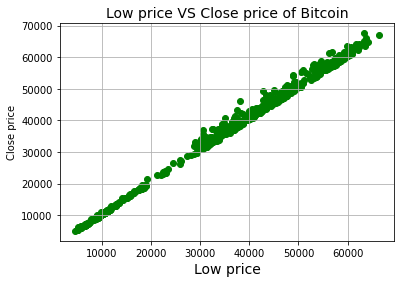

In [269]:
plt.scatter(btc_price['Low'],btc_price['Close'], color='green')
plt.title('Low price VS Close price of Bitcoin', fontsize=14)
plt.xlabel('Low price', fontsize=14)
plt.ylabel('Close price')
plt.grid(True)
plt.show() # We can see a linear relationship

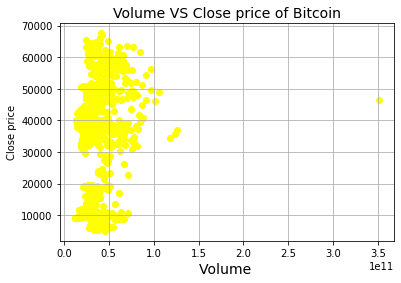

In [270]:
plt.scatter(btc_price['Volume'],btc_price['Close'], color='yellow')
plt.title('Volume VS Close price of Bitcoin', fontsize=14)
plt.xlabel('Volume ', fontsize=14)
plt.ylabel('Close price')
plt.grid(True)
plt.show()

MULTIVARIATE ANALYSIS OF BTC PRICES

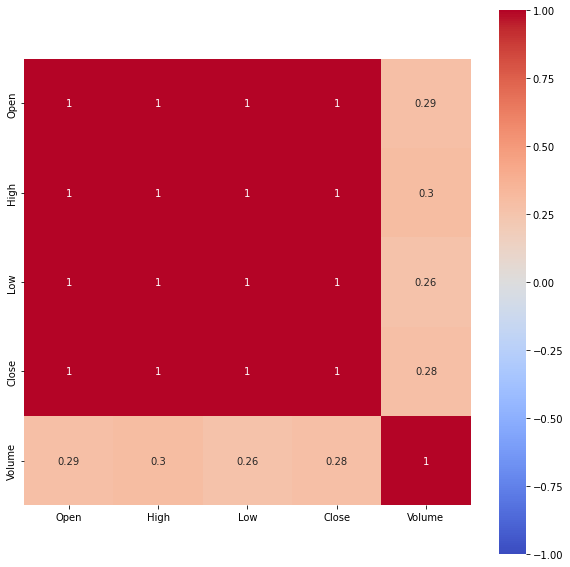

In [271]:
import seaborn as sns
plt.figure(figsize = (10,10))
btc_corr= btc_price.corr()
sns.heatmap(btc_corr, center=0, vmin = -1, vmax=1, annot = True, square = True,cmap="coolwarm")
plt.show()

In [272]:
#PRINTING CORRELATION VALUES
print(btc_price.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.998791  0.997732  0.996963  0.287200
High    0.998791  1.000000  0.997611  0.998695  0.297806
Low     0.997732  0.997611  1.000000  0.998424  0.263346
Close   0.996963  0.998695  0.998424  1.000000  0.283113
Volume  0.287200  0.297806  0.263346  0.283113  1.000000


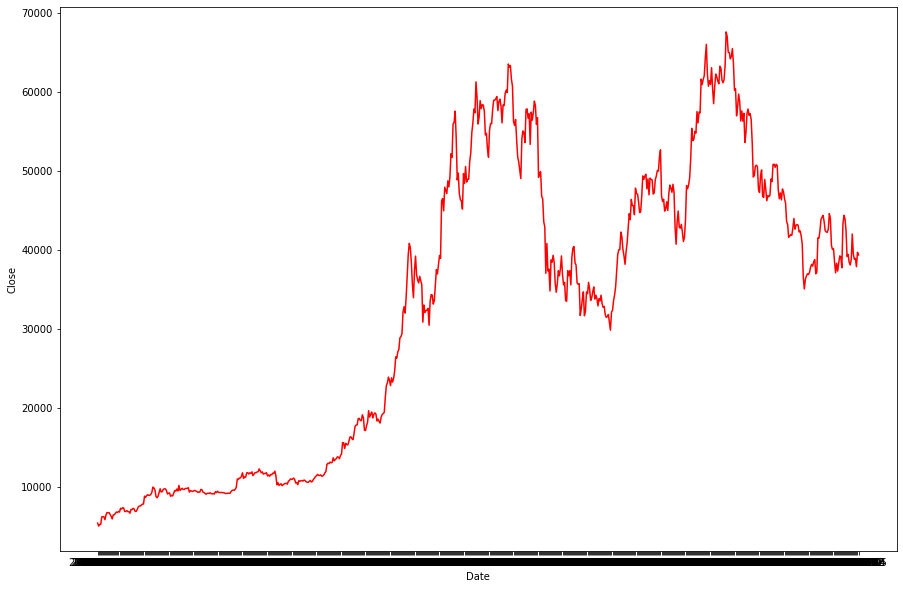

In [273]:
# btc_price.index =btc_price['Date']
plt.figure(figsize=(15,10))
plt.plot(btc_price['Close'], label="Close price history of bitcoin", color='red')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()